In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
# https://www.kaggle.com/datasets/harshghadiya/kidneystone

In [4]:
df = pd.read_csv('kindey stone urine analysis.csv')
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


Gravity : Urine density relative to water, which indicates the concentration of dissolved substances.

pH : A scale ranging from 1 to 14 that measures the acidity or alkalinity of an aqueous solution; 7 being neutral.

Osmo : Osmolality, the concentration of osmoles (particles that contribute to osmotic pressure) in a solution, expressed as milliosmoles per liter (mOsm/L) in biological systems.

Cond : Electrical conductivity, a measure of a liquid's ability to conduct electricity, which depends on the number of ions per unit volume and their drift velocity.

Urea : Urea concentration in the urine, measured in millimoles per liter (mmol/L).

Calc : Calcium concentration in the urine, measured in millimoles per liter (mmol/L).

Target : The presence (True/False) of a kidney stone based on the analysis of the above urine parameters.

In [5]:
df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987,0.430380
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051,0.498293
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000,0.000000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000,0.000000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.target.value_counts()

0    45
1    34
Name: target, dtype: int64

The target values are not too imbalanced so it is fine

In [9]:
df1 = df.copy()
df1 = df1.drop(['target'], axis=1)
df1

,gravity,ph,osmo,cond,urea,calc
0,1.021,4.91,725,14.0,443,2.45
1,1.017,5.74,577,20.0,296,4.49
2,1.008,7.20,321,14.9,101,2.36
3,1.011,5.51,408,12.6,224,2.15
4,1.005,6.52,187,7.5,91,1.16
...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04
75,1.017,4.81,410,13.3,195,0.58
76,1.024,5.40,803,21.8,394,7.82
77,1.016,6.81,594,21.4,255,12.20


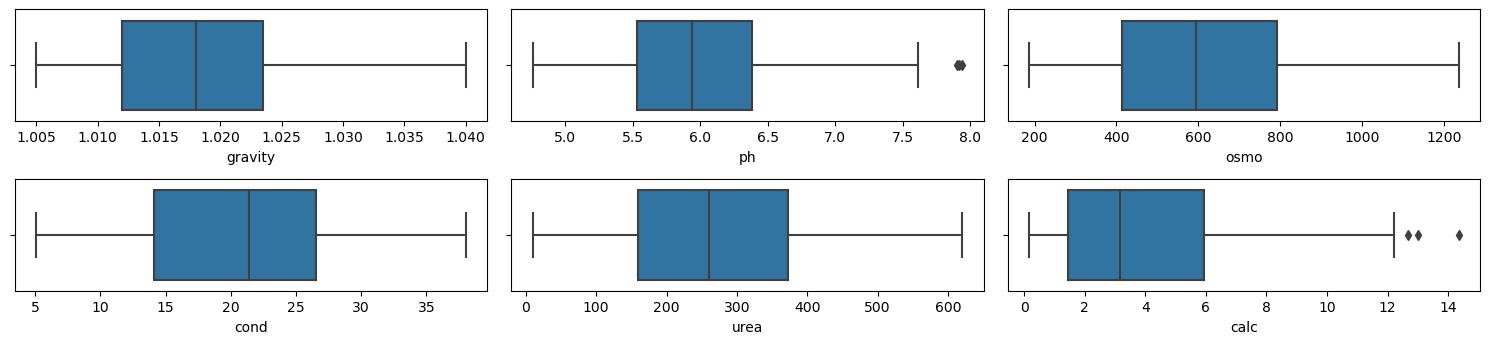

In [10]:
plt.subplots(figsize=(15,15))
features = list(df1.select_dtypes(include = np.number).columns)

for i, col in enumerate(features):
  plt.subplot(9,3, i + 1)
  sns.boxplot(df1[col])
plt.tight_layout()
plt.show()

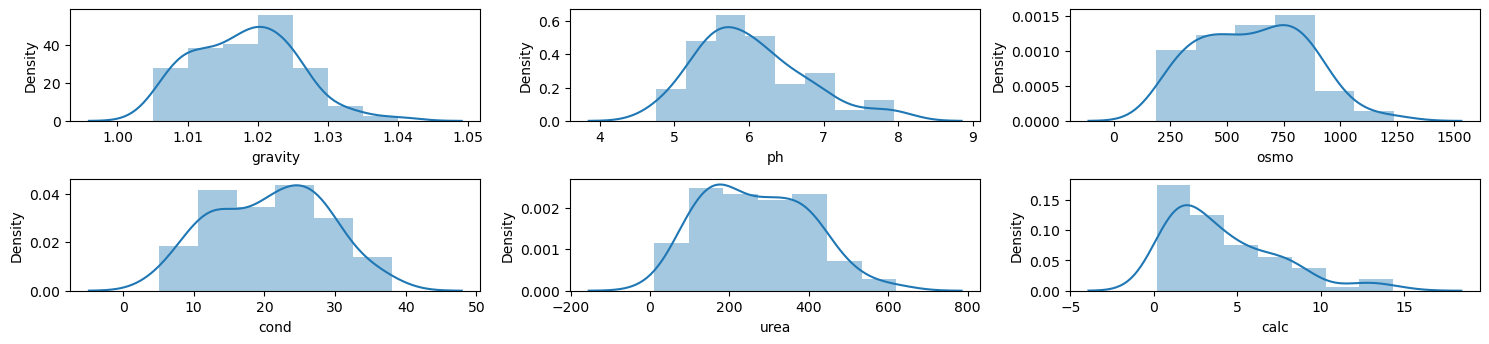

In [11]:
plt.subplots(figsize=(15,15))

for i, col in enumerate(features):
  plt.subplot(9,3, i + 1)
  sns.distplot(df1[col])
plt.tight_layout()
plt.show()

Dividing the dataset into test and train set

In [12]:
y = df['target']
X = df1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Create a default decision tree model

In [13]:
tree = DecisionTreeClassifier(random_state=0)
# Dictionary of possible hyperparameter values
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

tree1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'precision', 'accuracy', 'f1', 'roc_auc', 'recall'})

In [14]:
print(tree1.best_params_) 
print(tree1.best_score_)

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.7554563492063491


In [15]:
y_pred = tree1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.75
Precision: 0.7
Recall: 0.7777777777777778


Since there a very few variables for each row, I will add some extra colums based on the already existing varibables as feature
engineering. The goal is to check that outcome will be different.

In [16]:
df1['Calcium to urea concentration ratio'] = df1['calc']/df1['urea'] 
df1['pH to calcium concentration ratio'] = df1['ph']/df1['calc']
df1['Electrical conductivity to osmolality ratio'] = df1['cond']/df1['osmo']
df1['pH to urea concentration ratio'] = df1['ph']/df1['urea'] 

In [17]:
df1.head()

,gravity,ph,osmo,cond,urea,calc,Calcium to urea concentration ratio,pH to calcium concentration ratio,Electrical conductivity to osmolality ratio,pH to urea concentration ratio
0,1.021,4.91,725,14.0,443,2.45,0.005530,2.004082,0.019310,0.011084
1,1.017,5.74,577,20.0,296,4.49,0.015169,1.278396,0.034662,0.019392
2,1.008,7.20,321,14.9,101,2.36,0.023366,3.050847,0.046417,0.071287
3,1.011,5.51,408,12.6,224,2.15,0.009598,2.562791,0.030882,0.024598
4,1.005,6.52,187,7.5,91,1.16,0.012747,5.620690,0.040107,0.071648


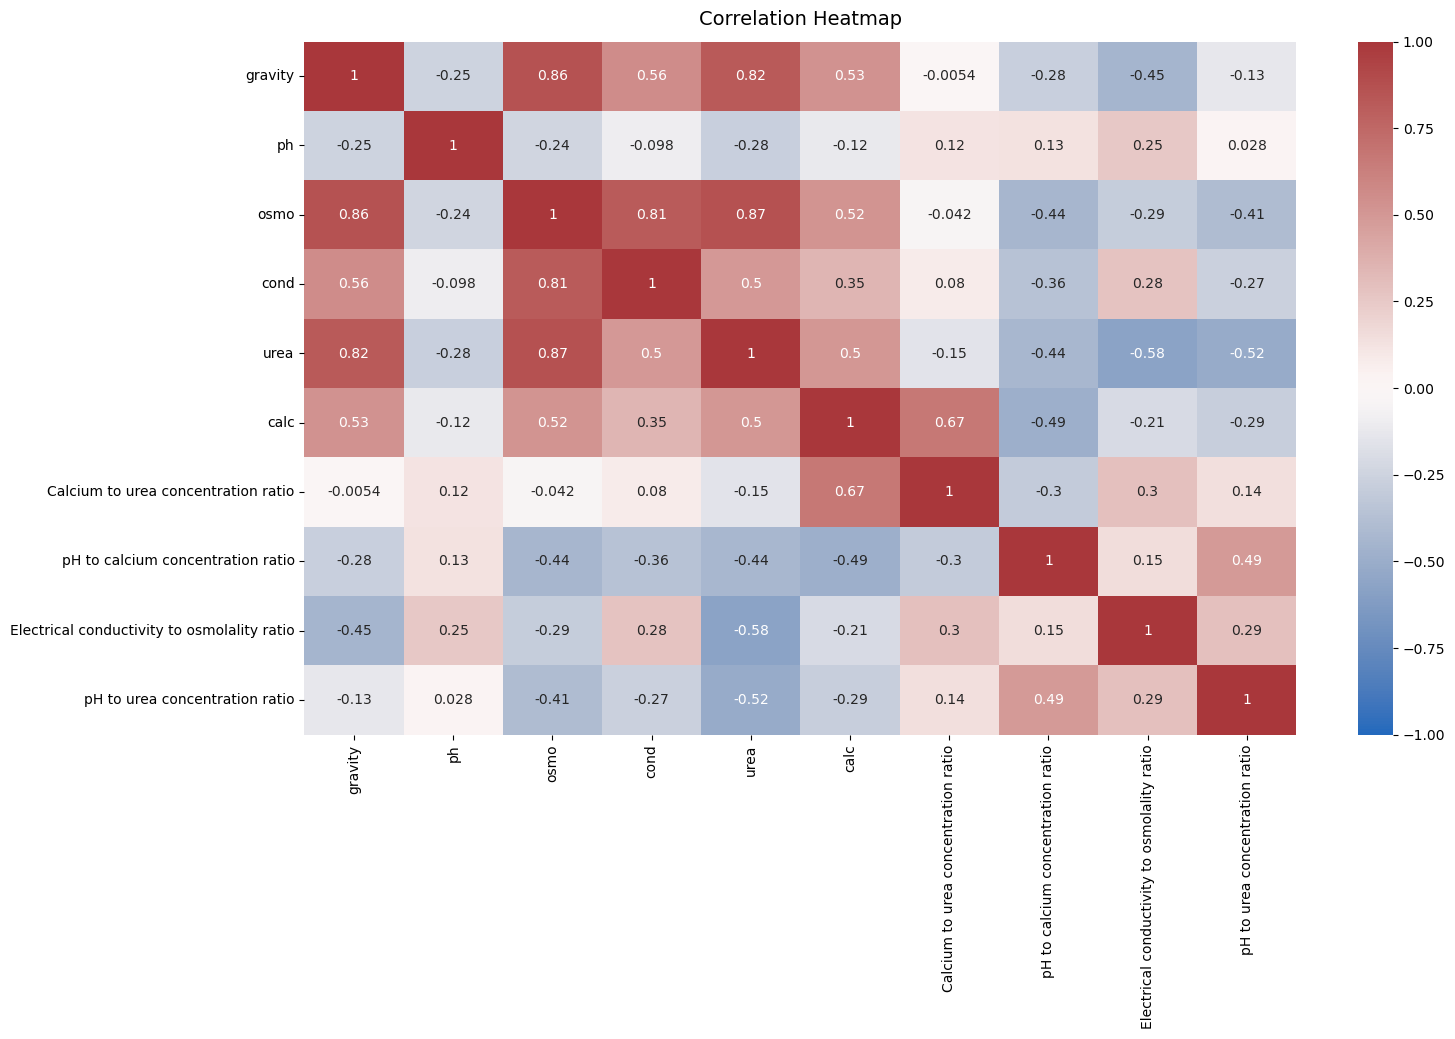

In [18]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Comparing different models after feature engineering

In [19]:
y = df['target']
X = df1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


tree1.fit(X_train, y_train)
print(tree1.best_params_) 
print(tree1.best_score_)

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.8110119047619048


In [20]:
tree2 = RandomForestClassifier(random_state=0)
rf_tree = GridSearchCV(tree2, cv_params, scoring=scoring, cv=4, refit='roc_auc')

rf_tree.fit(X_train, y_train)
print(rf_tree.best_params_) 
print(rf_tree.best_score_)

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.843915343915344


In [21]:
tree3 = GradientBoostingClassifier(random_state=0)
grd_tree = GridSearchCV(tree3, cv_params, scoring=scoring, cv=4, refit='roc_auc')

grd_tree.fit(X_train, y_train)
print(grd_tree.best_params_) 
print(grd_tree.best_score_)

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}
0.8290343915343914


In [22]:
tree4 = XGBClassifier(random_state=0)
xgb = GridSearchCV(tree4, cv_params, scoring=scoring, cv=4, refit='roc_auc')

xgb.fit(X_train, y_train)
print(xgb.best_params_) 
print(xgb.best_score_)

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8177083333333334


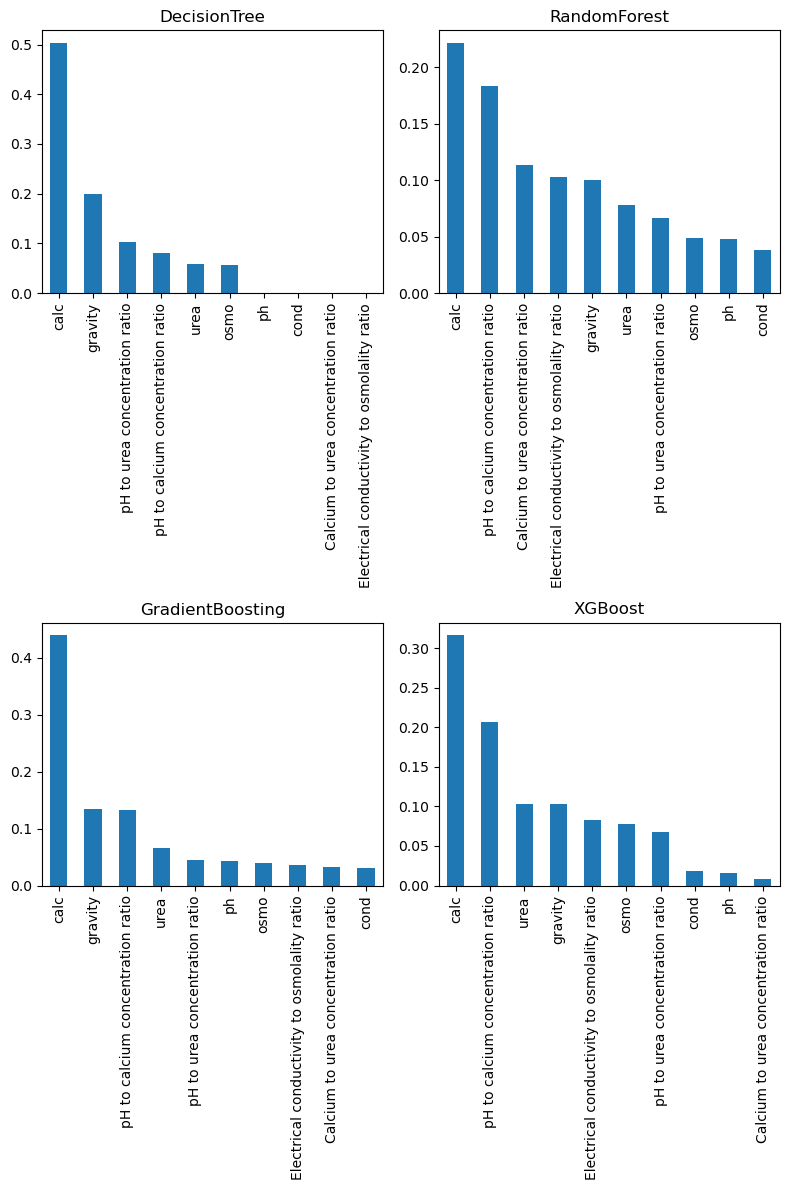

In [23]:
plt.subplots(figsize=(8,12))
models = [tree,tree2,tree3,tree4]
model_names = ['DecisionTree', 'RandomForest', 'GradientBoosting', 'XGBoost']
for i, mod in enumerate(models):
  ax = plt.subplot(2,2, i + 1)
  mod.fit(X_train, y_train)
  importances = mod.feature_importances_
  model_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
  model_importances.plot.bar(ax=ax);
  ax.set_title(model_names[i]) 
plt.tight_layout()
plt.show()


The RandomForest provided the best result. Note that different models weight the variables differently.